In [1]:
import requests
import numpy as np
from scipy.optimize import curve_fit
from src.plotter.Plotter import Plotter
from src.maths.Error import r_squared

In [6]:
R = 8.31
M = 200.59e-3

critical_temperature = 1490+273.15
critical_pressure = 1510e5
critical_density = 5500

data = requests.get('http://v5464.hosted-by-vdsina.com:8000/science/phases/?format=json').json()['results']
temperature = np.array([dat['temperature'] for dat in data])
pressure = np.array([dat['pressure'] for dat in data])
density = np.array([dat['density'] for dat in data])

sort_mask = np.lexsort((temperature, pressure, density))
temperature = temperature[sort_mask]
pressure = pressure[sort_mask]
density = density[sort_mask]

saturation_data = requests.get('http://v5464.hosted-by-vdsina.com:8000/science/saturations/?format=json&limit=1000').json()['results']
saturation_temperature = np.array([dat['temperature'] for dat in saturation_data])
saturation_pressure = np.array([dat['pressure'] for dat in saturation_data])
saturation_density = np.array([dat['density'] for dat in saturation_data])

In [83]:
def saturation_line(tau, a_1, a_2, a_3, a_4, a_5, a_6):
    return 1/tau * (a_1 * (1-tau) + a_2 * (1-tau) ** 1.5 + a_3 * (1-tau) ** 3 + a_4 * (1-tau) ** 3.5 + a_5 * (1-tau) ** 4 + a_6 * (1-tau) ** 7.5)

def saturation_density_line(pressure, a, b):
    return a * pressure + b

def fit_function(x, a, b):
    return a * x + b

x = critical_temperature / saturation_temperature
y = np.log(saturation_pressure / critical_pressure)

wagner_popt, wagner_pcov = curve_fit(saturation_line, x, y)
wagner_x = np.linspace(min(saturation_temperature), critical_temperature)
wagner_y = saturation_line(critical_temperature / wagner_x, *wagner_popt)
wagner_R = r_squared(np.exp(saturation_line(x, *wagner_popt)) * critical_pressure, saturation_pressure)

saturation_popt, saturation_pcov = curve_fit(fit_function, 1 / x, y)
saturation_x = wagner_x
saturation_y = fit_function(saturation_x, *saturation_popt)

plotter = Plotter(dimension='2d')
plotter.scatter(saturation_temperature, saturation_pressure, color='b', label='Experimental data', alpha=0.5)
plotter.scatter(critical_temperature, critical_pressure, color='r', label='Critical point')
# plotter.plot(wagner_x, wagner_y, label=rf'Wagner equation, $R^2={np.round(wagner_R, 4)}$', color='r')
plotter.plot(saturation_x, saturation_y, '--k', label='Saturation equation')
plotter.xlabel(r'$\frac {T_s} {T_c}$')
plotter.ylabel(r'$ln( \frac {p_s} {p_c})$')
plotter.grid(True)
plotter.legend()
plotter.show()

C:\Users\glebf\AppData\Local\Temp\ipykernel_18352\3891208080.py:2: RuntimeWarning: invalid value encountered in power
  return 1/tau * (a_1 * (1-tau) + a_2 * (1-tau) ** 1.5 + a_3 * (1-tau) ** 3 + a_4 * (1-tau) ** 3.5 + a_5 * (1-tau) ** 4 + a_6 * (1-tau) ** 7.5)


In [17]:
pheta_linspace = np.exp(saturation_line(tau_linspace, *sat_popt))
dheta_linspace = np.exp(saturation_density_line(np.log(pheta_linspace), *den_popt))

plotter = Plotter(dimension='3d')
plotter.scatter(saturation_temperature, saturation_pressure, saturation_density)
plotter.plot(tau_linspace * critical_temperature, pheta_linspace * critical_pressure, dheta_linspace * critical_density)
plotter.scatter(critical_temperature, critical_pressure, critical_density, color='r')
plotter.grid(True)
plotter.show()

In [56]:
%matplotlib inline

In [12]:
%matplotlib qt

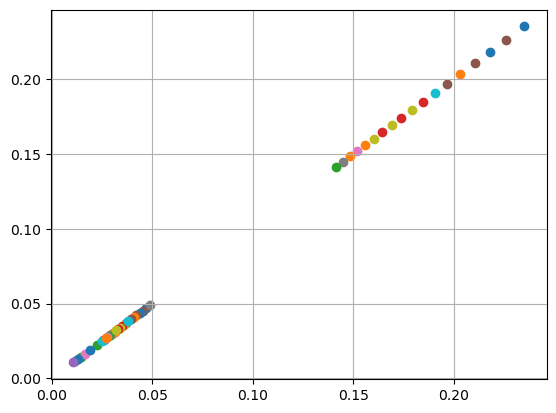

In [9]:
Z = pressure * M / (R * temperature)
temperature_set = list(set(temperature))
plotter = Plotter(dimension='2d')
for temp in temperature_set:
    mask = (temperature == temp)
    plotter.scatter(density[mask], Z[mask])
plotter.grid(True)
plotter.show()

In [55]:
def fit_function(x, a, b):
    return a * x + b

x = critical_temperature / saturation_temperature
y = np.log(saturation_pressure / critical_pressure)

fit_popt, fit_pcov = curve_fit(fit_function, x, y)
fit_popt = np.round(fit_popt, 2)
x_linspace = np.linspace(1, max(x))
y_linspace = fit_function(x_linspace, *fit_popt)

plotter = Plotter(dimension='2d')
plotter.scatter(x, y, alpha=0.5, color='b', label='Experimental data')
plotter.plot(x_linspace, y_linspace, color='r', label='Saturation equation')
plotter.legend()
plotter.grid(True)
plotter.text(5, -14, rf'$y={fit_popt[0]} \bullet x + {fit_popt[1]}$')
plotter.xlabel(r'$\frac {T_c} {T_s}$')
plotter.ylabel(r'$ln(\frac {p_s} {p_c})$')
plotter.show()

In [56]:
plotter = Plotter(dimension='2d')
plotter.scatter(saturation_temperature, saturation_pressure, color='b', alpha=0.5, label='Experimental data')
plotter.scatter(critical_temperature, critical_pressure, color='r', label='Critical point')
plotter.plot(critical_temperature / x_linspace, np.exp(y_linspace) * critical_pressure, color='r', label='Saturation equation')
plotter.grid(True)
plotter.xlabel(r'$T (K)$')
plotter.ylabel(r'$p (Pa)$')
plotter.legend()
plotter.show()